Let's start by looking at what I have

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
contracts = pd.read_json("initial-data.json")

ValueError: Trailing data

In [3]:
# interesting.  the data is just a mongo dump, so it should be properly formatted. letsee....
contracts = pd.read_json("initial-data.json", lines=True)

In [4]:
# that's better.
contracts.head()

,_id,arbitration,assume-risk,choice-of-law,class-action-wavier,contract,found-k,indemnification,ip-in-personal-data,license-not-sale,opt-out,snail-mail,url,waive-warranties
0,https://hasura.io,0.0,0.0,0.0,0.0,Acceptable Use Policy\nYour use of the Service...,1.0,0.0,0.0,0.0,0.0,0.0,https://hasura.io,0.0
1,https://nightwatch.io,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,https://nightwatch.io,NaN
2,http://www.submarinecablemap.com,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,http://www.submarinecablemap.com,NaN
3,http://www.theaivc.com,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,http://www.theaivc.com,NaN
4,http://www.slimfoldwallet.com,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,http://www.slimfoldwallet.com,NaN


In [5]:
# NANs?  Really?  Pandas's data import capacities are greatly overrated.  enough of this, doing it by hand.
import json
ks = []
with open("initial-data.json") as id:
    for line in id:
        ks.append(json.loads(line))

In [6]:
ks[0]

{'_id': 'https://hasura.io',
 'arbitration': False,
 'assume-risk': False,
 'choice-of-law': False,
 'class-action-wavier': False,
 'contract': 'Acceptable Use Policy\nYour use of the Service is subject to this Acceptable Use Policy. If you are found to be in violation of our policies at any time, as determined by Hasura in its sole discretion, we may warn you or suspend or terminate your account. Please note that we may change our Acceptable Use Policy at any time, and pursuant to the Hasura Terms, it is your responsibility to keep up-to-date with and adhere to the policies posted here. All capitalized terms used herein have the meanings stated in the Terms, unless stated otherwise.\n\nProhibited Content\nThe Content displayed and/or processed through your Application or other web site utilizing the Service shall not contain any of the following types of content:\n\nContent that infringes a third party’s rights (e.g., copyright) according to applicable law;\nExcessively profane conten

In [7]:
contracts = pd.DataFrame(ks)

In [8]:
contracts.head()

,_id,arbitration,assume-risk,choice-of-law,class-action-wavier,contract,found-k,indemnification,ip-in-personal-data,license-not-sale,opt-out,snail-mail,url,waive-warranties
0,https://hasura.io,False,False,False,False,Acceptable Use Policy\nYour use of the Service...,True,False,False,False,False,False,https://hasura.io,False
1,https://nightwatch.io,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,https://nightwatch.io,NaN
2,http://www.submarinecablemap.com,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,http://www.submarinecablemap.com,NaN
3,http://www.theaivc.com,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,http://www.theaivc.com,NaN
4,http://www.slimfoldwallet.com,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,http://www.slimfoldwallet.com,NaN


In [9]:
# still?  oh ffs, pandas.  
ks[1]

{'_id': 'https://nightwatch.io',
 'found-k': False,
 'url': 'https://nightwatch.io'}

In [10]:
# aaah.  Missing data.  oh goodie.  fine.  I can actually live with that.

In [11]:
# actually, I like the implicit pandas conversions.  I take it back pandas, your data import is fine and dandy.
contracts = pd.read_json("initial-data.json", lines=True)

In [12]:
hask = contracts[contracts['found-k'] == 1.0]

In [13]:
len(hask)

123

In [14]:
# well.  It looks like our first task will be to find the contracts that my law students couldn't.  I refuse to believe that almost 2/3 of the websites on a sample of product hunt don't have any kind of ToS.  
# let's find a list of the bad sites, eh?
badsites = list(contracts[contracts['found-k'] == 1.0]['url'])

In [15]:
badsites[0]

'https://hasura.io'

In [16]:
# oops.
badsites = list(contracts[contracts['found-k'] == 0.0]['url'])

In [17]:
badsites[0]

'https://nightwatch.io'

Ok, how can we identify contracts on the sites that the law students missed? I don't have enough material to train a classifier (123 positive examples and 0 negative examples does not a training set make!), but I can at least use some heuristics.  First of all, let's look into stuff like document length, maybe some word commonalities...

In [19]:
hask["num_words"] = hask["contract"].apply(len)

TypeError: object of type 'float' has no len()

In [20]:
# eh? 
hask["contract"].apply(print)

Acceptable Use Policy
Your use of the Service is subject to this Acceptable Use Policy. If you are found to be in violation of our policies at any time, as determined by Hasura in its sole discretion, we may warn you or suspend or terminate your account. Please note that we may change our Acceptable Use Policy at any time, and pursuant to the Hasura Terms, it is your responsibility to keep up-to-date with and adhere to the policies posted here. All capitalized terms used herein have the meanings stated in the Terms, unless stated otherwise.

Prohibited Content
The Content displayed and/or processed through your Application or other web site utilizing the Service shall not contain any of the following types of content:

Content that infringes a third party’s rights (e.g., copyright) according to applicable law;
Excessively profane content;
Hate-related or violent content;
Content advocating racial or ethnic intolerance;
Content intended to advocate or advance computer hacking or crackin

0      None
7      None
9      None
11     None
12     None
13     None
14     None
16     None
17     None
18     None
20     None
21     None
22     None
23     None
24     None
26     None
29     None
30     None
31     None
32     None
36     None
38     None
39     None
41     None
42     None
43     None
45     None
49     None
51     None
52     None
       ... 
253    None
257    None
258    None
260    None
261    None
266    None
267    None
268    None
271    None
273    None
274    None
276    None
280    None
281    None
284    None
285    None
286    None
290    None
291    None
293    None
295    None
298    None
300    None
301    None
302    None
303    None
306    None
312    None
313    None
316    None
Name: contract, Length: 123, dtype: object

In [21]:
len(hask)

123

In [22]:
# ok, so where the hell is the float that threw the error?
types = hask["contract"].apply(type)

In [23]:
types

0        <class 'str'>
7        <class 'str'>
9        <class 'str'>
11       <class 'str'>
12       <class 'str'>
13       <class 'str'>
14       <class 'str'>
16       <class 'str'>
17       <class 'str'>
18       <class 'str'>
20       <class 'str'>
21       <class 'str'>
22       <class 'str'>
23       <class 'str'>
24       <class 'str'>
26       <class 'str'>
29       <class 'str'>
30       <class 'str'>
31       <class 'str'>
32       <class 'str'>
36       <class 'str'>
38       <class 'str'>
39       <class 'str'>
41       <class 'str'>
42       <class 'str'>
43       <class 'str'>
45       <class 'str'>
49       <class 'str'>
51       <class 'str'>
52       <class 'str'>
            ...       
253      <class 'str'>
257      <class 'str'>
258      <class 'str'>
260      <class 'str'>
261      <class 'str'>
266      <class 'str'>
267      <class 'str'>
268      <class 'str'>
271      <class 'str'>
273      <class 'str'>
274      <class 'str'>
276      <class 'str'>
280      <c

In [25]:
# there may be others, but let's start by looking at that one
hask.iloc[[286]]

IndexError: positional indexers are out-of-bounds

In [28]:
# oh wait, this is a subset.  sigh. 
wtf = hask[type(hask['contract']) == str]

KeyError: False

In [29]:
# christ pandas is annoying sometimes 
hask["type_of_contract_string"] = hask["contract"].apply(type)

/Users/pauliglot/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
hask.head()

,_id,arbitration,assume-risk,choice-of-law,class-action-wavier,contract,found-k,indemnification,ip-in-personal-data,license-not-sale,opt-out,snail-mail,url,waive-warranties,type_of_contract_string
0,https://hasura.io,0.0,0.0,0.0,0.0,Acceptable Use Policy\nYour use of the Service...,1.0,0.0,0.0,0.0,0.0,0.0,https://hasura.io,0.0,<class 'str'>
7,https://comelite.net,0.0,0.0,1.0,0.0,Website & Mobile App Terms & Conditions of Use...,1.0,0.0,0.0,1.0,0.0,0.0,https://comelite.net,1.0,<class 'str'>
9,http://homescreen.me,0.0,0.0,1.0,0.0,Terms of Use\nThe effective date of these Term...,1.0,0.0,0.0,1.0,0.0,0.0,http://homescreen.me,0.0,<class 'str'>
11,http://superpowered.com,1.0,0.0,1.0,1.0,License\nThe following document details the Su...,1.0,1.0,1.0,1.0,0.0,0.0,http://superpowered.com,1.0,<class 'str'>
12,http://www.agora.io,0.0,0.0,1.0,0.0,"AGORA, INC. SDK LICENSE AGREEMENT\nThis SDK Li...",1.0,1.0,0.0,1.0,0.0,1.0,http://www.agora.io,1.0,<class 'str'>


In [31]:
hask.iloc[[0]].type_of_contract_string == str

0    True
Name: type_of_contract_string, dtype: bool

In [32]:
# NOW WILL YOU PLEASE LET ME SEE THE ROWS WITHOUT STRING CONTRACTS?!
wtf = hask[hask.type_of_contract_string != str]

In [33]:
len(wtf)

3

In [34]:
wtf.head()

,_id,arbitration,assume-risk,choice-of-law,class-action-wavier,contract,found-k,indemnification,ip-in-personal-data,license-not-sale,opt-out,snail-mail,url,waive-warranties,type_of_contract_string
221,https://www.getbinocs.com,1.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,https://www.getbinocs.com,1.0,<class 'float'>
232,https://tolks.io,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,https://tolks.io,NaN,<class 'float'>
286,https://www.facebook.com,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,https://www.facebook.com,0.0,<class 'float'>


In [36]:
# note to self: next time, be sure to record which student entered which rows so I can fire the person who did that garbage.
# for now we'll just drop them.
hask = hask[hask.type_of_contract_string == str]

In [37]:
# finally...
hask["word_counts"] = hask["contract"].apply(len)

/Users/pauliglot/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


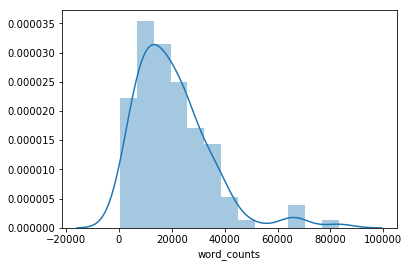

In [38]:
# gotta turn off that warning.  also can we please get a dataframe in clojure or some other sensible immutable language?  kthx
# anyway.  now I can at least see what kind of word counts I'm working with.
sns.distplot(hask.word_counts)

/Users/pauliglot/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


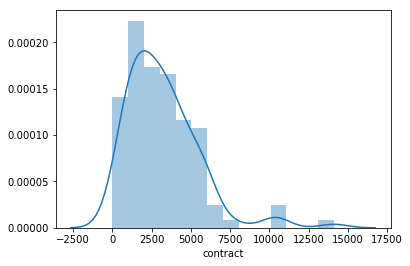

In [40]:
# I'm a silly boy.  those are character counts, not word counts.
def count_words(s):
    return len(s.split(" "))
# ok fine mutable data is sometimes convenient
hask.rename(columns={'word_counts':'character_counts'}, inplace=True)
hask.word_counts = hask["contract"].apply(count_words)
sns.distplot(hask.word_counts)

That's longer than I expected, but ok. So my sweet spot is going to be in that 2500+ word category.  What else can I use as a heuristic to distinguish contracts for a quick scrape? 

Here's an idea.  *contractey* words are going to be words that appear frequently in the contract dataset but don't appear frequently in english in general.  Peter Norvig has [word counts for a few hundred thousand common words](http://norvig.com/ngrams/count_1w.txt), which I'll just download for now; they're a few years old (but then again, contract writing probably laggs writing in general).

So let's define a word's contract-frequency number of times it appears in the contracts I have, and its language-frequency as the number of times it appears in Norvig's counts. Since there may be words in the contracts that don't appear in the counts on grounds of them being very rare, I'll assign them a language-frequency of the minimum of Norvig's list.  (Anything smaller poses an unacceptable risk of overweighting stuff like proper names.)  Then a word's score will be `log(contract-frequency/language-frequency)`, and anything with a score a standard deviation or so above average should be a *fairly decent* indicator of a ToS, I hope...

We'll have to do a bit of cleanup and preprocessing first...

In [47]:
# let's hope there isn't too much non-ascii stuff in here. 

import string
transtable = {ord(c): None for c in string.digits + string.punctuation}
def cleanstring(s):
    return s.translate(transtable).lower()

cleanks = [cleanstring(x) for x in hask.contract]

In [48]:
cleanks[0]

'acceptable use policy\nyour use of the service is subject to this acceptable use policy if you are found to be in violation of our policies at any time as determined by hasura in its sole discretion we may warn you or suspend or terminate your account please note that we may change our acceptable use policy at any time and pursuant to the hasura terms it is your responsibility to keep uptodate with and adhere to the policies posted here all capitalized terms used herein have the meanings stated in the terms unless stated otherwise\n\nprohibited content\nthe content displayed andor processed through your application or other web site utilizing the service shall not contain any of the following types of content\n\ncontent that infringes a third party’s rights eg copyright according to applicable law\nexcessively profane content\nhaterelated or violent content\ncontent advocating racial or ethnic intolerance\ncontent intended to advocate or advance computer hacking or cracking\ngambling\

In [49]:
# oh boy, I already see one problem: unicode quotations/"smart punctuation"
# god how I hate curly quotes.  Fortunately, I already have a list of the worst offenders (https://github.com/paultopia/ascii_punctuation/blob/master/ascii_punctuation.py)
evilpunc = "“”’‘—−…•–"
cleanks = [x.translate({ord(c): None for c in evilpunc}) for x in cleanks]

In [50]:
cleanks[0]

'acceptable use policy\nyour use of the service is subject to this acceptable use policy if you are found to be in violation of our policies at any time as determined by hasura in its sole discretion we may warn you or suspend or terminate your account please note that we may change our acceptable use policy at any time and pursuant to the hasura terms it is your responsibility to keep uptodate with and adhere to the policies posted here all capitalized terms used herein have the meanings stated in the terms unless stated otherwise\n\nprohibited content\nthe content displayed andor processed through your application or other web site utilizing the service shall not contain any of the following types of content\n\ncontent that infringes a third partys rights eg copyright according to applicable law\nexcessively profane content\nhaterelated or violent content\ncontent advocating racial or ethnic intolerance\ncontent intended to advocate or advance computer hacking or cracking\ngambling\n

In [51]:
# that looks clean enough.  
import itertools 
from collections import Counter
allks = Counter(itertools.chain(*cleanks))

In [52]:
# let's look and make sure there's nothing stupid here 
allks["agree"]

0

In [53]:
# well, there is indeed something stupid here.
allks

Counter({'\x03': 1,
         '\t': 221,
         '\n': 16629,
         ' ': 386111,
         'a': 147668,
         'b': 29258,
         'c': 77251,
         'd': 65295,
         'e': 233323,
         'f': 41805,
         'g': 32032,
         'h': 66090,
         'i': 154926,
         'j': 2018,
         'k': 6139,
         'l': 74018,
         'm': 46053,
         'n': 138871,
         'o': 166670,
         'p': 47750,
         'q': 1593,
         'r': 147515,
         's': 130842,
         't': 183940,
         'u': 66358,
         'v': 23769,
         'w': 25436,
         'x': 3990,
         'y': 47662,
         'z': 1591,
         '\x9f': 3,
         '£': 5,
         '§': 40,
         '©': 17,
         'ª': 1,
         '«': 1,
         '\xad': 39,
         '®': 11,
         '³': 7,
         '´': 1,
         '·': 7,
         '»': 1,
         'ß': 2,
         'à': 3,
         'â': 1,
         'ä': 1,
         'é': 1,
         'ó': 1,
         'ö': 1,
         'ü': 1,
         'ń': 1,


In [56]:
# ROFL.  We're back to characters again because I'm a ninny sometimes.
# ALSO I should have done this the first time because now I have some more stuff to get rid of.

garbage = [x for x in dict(allks).keys() if x not in string.ascii_lowercase]

In [57]:
garbage

['\u200b',
 '≥',
 '●',
 'ß',
 '‐',
 ' ',
 'à',
 '©',
 'є',
 'ó',
 'ª',
 '»',
 'ü',
 '³',
 '®',
 'ń',
 '\xad',
 '€',
 ';',
 'ä',
 '´',
 '\x9f',
 '\n',
 '‑',
 '\uf020',
 '™',
 'é',
 '«',
 'ö',
 '\t',
 '\x03',
 '\uf0b7',
 'â',
 '§',
 '·',
 '\u202f',
 '\uf09f',
 '£']

In [58]:
cleanks = [x.translate({ord(c): None for c in garbage}) for x in cleanks]

In [64]:
words = [x.split(" ") for x in cleanks]

In [65]:
len(words)

120

In [66]:
cleanks[0]

'acceptableusepolicyyouruseoftheserviceissubjecttothisacceptableusepolicyifyouarefoundtobeinviolationofourpoliciesatanytimeasdeterminedbyhasurainitssolediscretionwemaywarnyouorsuspendorterminateyouraccountpleasenotethatwemaychangeouracceptableusepolicyatanytimeandpursuanttothehasuratermsitisyourresponsibilitytokeepuptodatewithandadheretothepoliciespostedhereallcapitalizedtermsusedhereinhavethemeaningsstatedinthetermsunlessstatedotherwiseprohibitedcontentthecontentdisplayedandorprocessedthroughyourapplicationorotherwebsiteutilizingtheserviceshallnotcontainanyofthefollowingtypesofcontentcontentthatinfringesathirdpartysrightsegcopyrightaccordingtoapplicablelawexcessivelyprofanecontenthaterelatedorviolentcontentcontentadvocatingracialorethnicintolerancecontentintendedtoadvocateoradvancecomputerhackingorcrackinggamblingotherillegalactivityincludingwithoutlimitationillegalexportofcontrolledsubstancesorillegalsoftwaredrugparaphernaliaphishingmaliciouscontentothermaterialproductsorservicesthat

In [69]:
# oh boy.  I accidentally removed the spaces.  OOPS! Let's redo this.

garbage.remove(" ")

badchars = garbage + list(evilpunc) + list(string.digits) + list(string.punctuation)

# this time, let's pay attention, eh?
print(badchars)

['\u200b', '≥', '●', 'ß', '‐', 'à', '©', 'є', 'ó', 'ª', '»', 'ü', '³', '®', 'ń', '\xad', '€', ';', 'ä', '´', '\x9f', '\n', '‑', '\uf020', '™', 'é', '«', 'ö', '\t', '\x03', '\uf0b7', 'â', '§', '·', '\u202f', '\uf09f', '£', '“', '”', '’', '‘', '—', '−', '…', '•', '–', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [72]:
transtable = {ord(c): None for c in badchars}
def cleanstring(s):
    return s.translate(transtable).lower()

cleanks = [cleanstring(x) for x in hask.contract]


In [73]:
cleanks[0]

'acceptable use policyyour use of the service is subject to this acceptable use policy if you are found to be in violation of our policies at any time as determined by hasura in its sole discretion we may warn you or suspend or terminate your account please note that we may change our acceptable use policy at any time and pursuant to the hasura terms it is your responsibility to keep uptodate with and adhere to the policies posted here all capitalized terms used herein have the meanings stated in the terms unless stated otherwiseprohibited contentthe content displayed andor processed through your application or other web site utilizing the service shall not contain any of the following types of contentcontent that infringes a third partys rights eg copyright according to applicable lawexcessively profane contenthaterelated or violent contentcontent advocating racial or ethnic intolerancecontent intended to advocate or advance computer hacking or crackinggamblingother illegal activity i

In [74]:
# hmm.  I lost line breaks in there.  which of those weird unicode entities was a line break?  maybe I should just use spaces.

transtable = {ord(c): ord(" ") for c in badchars}
def cleanstring(s):
    return s.translate(transtable).lower()

cleanks = [cleanstring(x) for x in hask.contract]

In [75]:
cleanks[0]

'acceptable use policy your use of the service is subject to this acceptable use policy  if you are found to be in violation of our policies at any time  as determined by hasura in its sole discretion  we may warn you or suspend or terminate your account  please note that we may change our acceptable use policy at any time  and pursuant to the hasura terms  it is your responsibility to keep up to date with and adhere to the policies posted here  all capitalized terms used herein have the meanings stated in the terms  unless stated otherwise   prohibited content the content displayed and or processed through your application or other web site utilizing the service shall not contain any of the following types of content   content that infringes a third party s rights  e g   copyright  according to applicable law  excessively profane content  hate related or violent content  content advocating racial or ethnic intolerance  content intended to advocate or advance computer hacking or cracki

In [78]:
def splitwords(k):
    return [x for x in k.split(" ") if x]

In [79]:
splitwords(cleanks[0])

['acceptable',
 'use',
 'policy',
 'your',
 'use',
 'of',
 'the',
 'service',
 'is',
 'subject',
 'to',
 'this',
 'acceptable',
 'use',
 'policy',
 'if',
 'you',
 'are',
 'found',
 'to',
 'be',
 'in',
 'violation',
 'of',
 'our',
 'policies',
 'at',
 'any',
 'time',
 'as',
 'determined',
 'by',
 'hasura',
 'in',
 'its',
 'sole',
 'discretion',
 'we',
 'may',
 'warn',
 'you',
 'or',
 'suspend',
 'or',
 'terminate',
 'your',
 'account',
 'please',
 'note',
 'that',
 'we',
 'may',
 'change',
 'our',
 'acceptable',
 'use',
 'policy',
 'at',
 'any',
 'time',
 'and',
 'pursuant',
 'to',
 'the',
 'hasura',
 'terms',
 'it',
 'is',
 'your',
 'responsibility',
 'to',
 'keep',
 'up',
 'to',
 'date',
 'with',
 'and',
 'adhere',
 'to',
 'the',
 'policies',
 'posted',
 'here',
 'all',
 'capitalized',
 'terms',
 'used',
 'herein',
 'have',
 'the',
 'meanings',
 'stated',
 'in',
 'the',
 'terms',
 'unless',
 'stated',
 'otherwise',
 'prohibited',
 'content',
 'the',
 'content',
 'displayed',
 'and',
 

In [80]:
import itertools
words = list(itertools.chain(*[splitwords(x) for x in cleanks]))

In [81]:
len(words)

390759

In [82]:
# that's more like it.  
contract_frequencies = Counter(words)

In [84]:
len(contract_frequencies.keys())

7710

In [85]:
# now for norvig.
language_frequencies = {}
with open("norvig-list.txt") as nl:
    for x in nl:
        m = x.strip().split("\t")
        language_frequencies.update({m[0]: int(m[1])})

In [86]:
len(language_frequencies.keys())

333333

In [87]:
minval = min(language_frequencies.values())
print(minval)        

12711


In [88]:
from math import log
frequency_scores = {}
for x in contract_frequencies.keys():
    if x in language_frequencies:
        val = language_frequencies[x]
    else:
        val = minval
    frequency_scores.update({x: log(contract_frequencies[x]/val)}) # yay python three sensible division defaults!


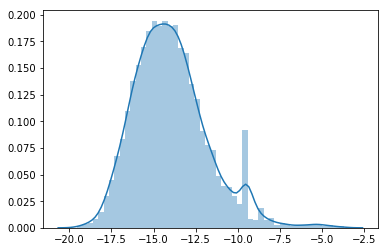

In [90]:
# let's look at our scores:
sns.distplot(list(frequency_scores.values()))

Ok.  So that looks roughly like what we'd expect---the frequency scores are about normally distributed, except for that weird spike on the right. Out of curiosity:

In [91]:
wordvals = list(frequency_scores.values())
import numpy as np
wordval_mean = np.mean(wordvals)
wordval_sd = np.std(wordvals)

In [92]:
print(wordval_mean, wordval_sd)

-13.9566885565 2.21270981445


If I'm right, then we should see a lot of legal words in the space of, saay, 2 standard deviations above the mean?

In [93]:
cutoff = wordval_mean + (2 * wordval_sd)
for word, score in frequency_scores.items():
    if score > cutoff:
        print(word)

dominicia
orresponsibility
gobe
impersonate
vgpu
getservice
carbonads
comelite
plagiarise
vyper
thruoght
tryremedy
helpjuice
webcrm
inure
statrow
severable
permanet
rockajoints
heroku
licensethe
botified
sift
noninfringement
partement
ntersect
mauritiania
startupvalue
aleja
ulmb
panols
weavora
conceptinbox
mediaserver
unavalability
nomnom
intimidates
automtically
ackowledging
moodmedia
linkid
nsist
agora
googleplay
lotusappdev
photokharma
spimming
indemnify
bitration
arbitration
tegrazone
weibo
dashla
disclaim
cospaces
infringing
superpoweredadvancedaudioplayer
nationalcourts
infringes
flareapp
nnection
uding
enforceability
xdoi
startyoshi
comyou
vinaya
pseudonymized
bdsg
inoperability
inscape
derstandings
rentain
decryptions
infringers
platformdating
itute
arbitrated
cleanfox
haftungsbeschr
tousubscriber
hased
sublicensable
gitlead
txaa
plasso
urweather
entora
yodas
mobiefitning
followable
godaddy
quaterly
dpuf
dashlane
policygenius
botmock
rattacent
retours
hanomaghof
serivices
laim


well, there are definitely a number of law words in here.  conscionability, indemnification, waivable, libelous, etc. There's also a lot of nonsense, typoes or copy-paste errors from data collection, or proper names, or parsing errors of otherwise good words (nationalcourts).  The cleanup process clearly needs improving. But for now this will do. 

I think I can go down to 1 or 1.5sd and compare against a good wordslist of non-proper english words, maybe w/in Levenshtein distance == 2 or something to correct for typos, spacing errors, etc. 

Interestingly, it turns out that the OED has [fewer words](https://en.oxforddictionaries.com/explore/how-many-words-are-there-in-the-english-language) in it than Norvig's list.  That suggests to me that maybe the easy solution is just to use his list as a canonical dictionary.

In [94]:
highscores = {}
cutoff = wordval_mean + wordval_sd
for word, score in frequency_scores.items():
    if score > cutoff:
        highscores.update({word: score})

In [95]:
len(highscores.keys())

1109

In [96]:
#this will be very VERY inefficient. 
word_dictionary = set(language_frequencies.keys())
from nltk.metrics.distance import edit_distance

# I think I'm going to limit myself to ld 1 words just to make sure it isn't too big.
def horrendously_slow_check(word):
    if word in word_dictionary:
        return(word)
    else:
        for x in word_dictionary:
            ld = edit_distance(word, x)
            if ld == 1:
                return x
        return None
                

In [ ]:
newhighscores = {}
for word, score in highscores.items():
    newword = horrendously_slow_check(word)
    if newword:
        newhighscores.update({word, score})